In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
df=pd.read_csv("C:\\Users\\GPTINF05\\Downloads\\boston_housing.csv")
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
a=df.drop(['CRIM','ZN','CHAS','NOX','AGE','RAD','PTRATIO','B','LSTAT'],axis=1)
a

,INDUS,RM,DIS,TAX,MEDV
0,2.31,6.575,4.0900,296,24.0
1,7.07,6.421,4.9671,242,21.6
2,7.07,7.185,4.9671,242,34.7
3,2.18,6.998,6.0622,222,33.4
4,2.18,7.147,6.0622,222,36.2
...,...,...,...,...,...
501,11.93,6.593,2.4786,273,22.4
502,11.93,6.120,2.2875,273,20.6
503,11.93,6.976,2.1675,273,23.9
504,11.93,6.794,2.3889,273,22.0


In [12]:
x=a.drop('MEDV',axis='columns')
x

,INDUS,RM,DIS,TAX
0,2.31,6.575,4.0900,296
1,7.07,6.421,4.9671,242
2,7.07,7.185,4.9671,242
3,2.18,6.998,6.0622,222
4,2.18,7.147,6.0622,222
...,...,...,...,...
501,11.93,6.593,2.4786,273
502,11.93,6.120,2.2875,273
503,11.93,6.976,2.1675,273
504,11.93,6.794,2.3889,273


In [13]:
y=a.MEDV
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
y=a['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.33,random_state = 0)

In [17]:
print("xtrain shape:",xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)


xtrain shape: (339, 4)
xtest shape: (167, 4)
ytrain shape: (339,)
ytest shape: (167,)


In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
y_pred = reg.predict(xtest)

In [19]:
reg.coef_

array([-0.21108811,  7.78049546, -0.49486174, -0.0140603 ])

In [20]:
reg.intercept_


-16.400330141857857

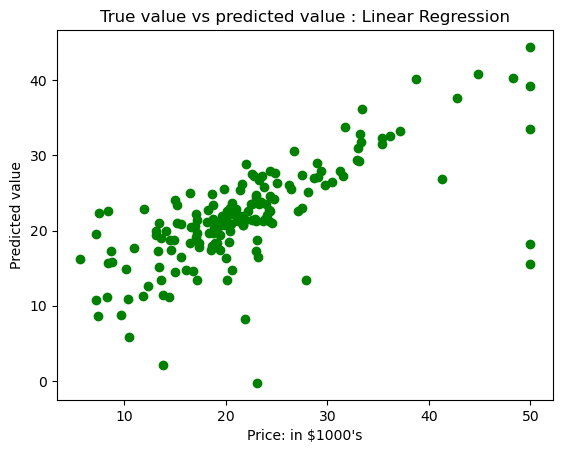

In [21]:
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [23]:
train_score=reg.score(xtrain,ytrain)
test_score=reg.score(xtest,ytest)

In [24]:
print('Train Score(R-squared):',train_score)
print('Test Score(R-squared):',test_score)

Train Score(R-squared): 0.5972805957232973
Test Score(R-squared): 0.5060056001257331


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  39.82688491379041
Mean Absolute Error :  4.0337041704005605
